In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

def visualize_val(path):
    test_results = pd.read_csv(path)
    pred = test_results['3']
    gt = test_results['4']

    # Replace actual_labels and predicted_labels with your own data
    cm = confusion_matrix(gt, pred)

    # Define class labels
    class_labels = ['Negative', 'Positive']

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    from sklearn.metrics import precision_score, recall_score, f1_score

    # Calculate precision
    precision = precision_score(gt, pred)

    # Calculate recall
    recall = recall_score(gt, pred)

    # Calculate F1 score
    f1 = f1_score(gt, pred)

    # Calculate accuracy
    acc = sum(x==y for x,y in zip(gt,pred))/len(gt)

    print(f'Accuracy: {acc}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    return pred

# 1. Heatmap only

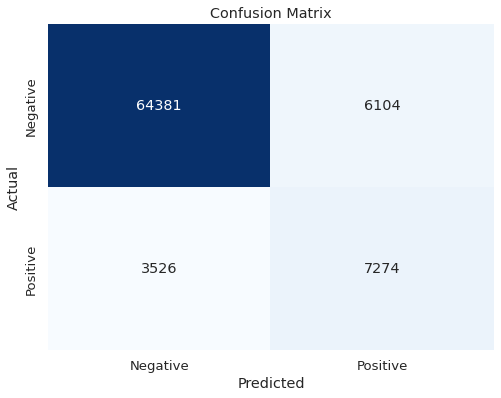

Accuracy: 0.881527957187673
Precision: 0.5437285094931978
Recall: 0.6735185185185185
F1 Score: 0.6017040284556208


In [2]:
path = '/work/adapting-CLIP-VGPs/checkpoints/heatmap only/22_checkpoint9.csv'
pred = visualize_val(path)

In [3]:
heatmap_only_pred = pred.copy()

# 2. Text+heatmap

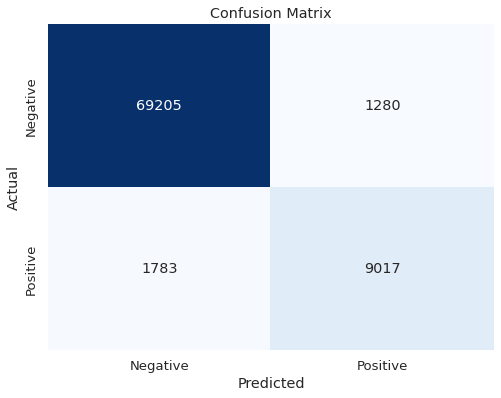

Accuracy: 0.9623177708064219
Precision: 0.8756919491113917
Recall: 0.8349074074074074
F1 Score: 0.8548134805896573


In [4]:
path = '/work/adapting-CLIP-VGPs/checkpoints/text+heatmap2/45_checkpoint9.csv'
pred = visualize_val(path)

In [5]:
text_heatmap_pred = pred.copy()

# Text only

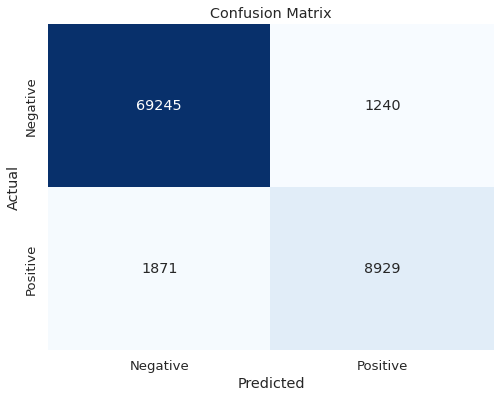

Accuracy: 0.9617272559512825
Precision: 0.8780607729373586
Recall: 0.8267592592592593
F1 Score: 0.851638132481282


In [6]:
path = '/work/adapting-CLIP-VGPs/checkpoints/text only/10_checkpoint36.csv'
pred = visualize_val(path)

In [7]:
text_only_pred = pred.copy()

In [8]:
text_only_pred

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
81280    0.0
81281    1.0
81282    0.0
81283    0.0
81284    0.0
Name: 3, Length: 81285, dtype: float64

# 3. F1 score over cos sim

## Export test predictions

In [9]:
import pandas as pd

cos_sim_val_res = pd.read_csv('/work/adapting-CLIP-VGPs/eval/test_text_hm.csv')
cos_sim_val_res.head()

,img_idx,phrases,text_sim,heatmap_sim,avgsim,pred,ytrue
0,1016887272,"['Several climbers', 'Seven climbers']",0.886846,0.931074,0.908960,True,True
1,1016887272,"['Several climbers', 'a rock face']",0.669547,0.151576,0.410561,False,False
2,1016887272,"['Several climbers', 'another man']",0.614288,0.332594,0.473441,False,False
3,1016887272,"['Several climbers', 'the rope']",0.594157,0.239266,0.416711,False,False
4,1016887272,"['the rock', 'Seven climbers']",0.587064,0.153814,0.370439,False,False


In [10]:
cos_sim_val_res.rename(columns={'pred': 'avg_sim_pred'}, inplace=True)
cos_sim_val_res.head()

,img_idx,phrases,text_sim,heatmap_sim,avgsim,avg_sim_pred,ytrue
0,1016887272,"['Several climbers', 'Seven climbers']",0.886846,0.931074,0.908960,True,True
1,1016887272,"['Several climbers', 'a rock face']",0.669547,0.151576,0.410561,False,False
2,1016887272,"['Several climbers', 'another man']",0.614288,0.332594,0.473441,False,False
3,1016887272,"['Several climbers', 'the rope']",0.594157,0.239266,0.416711,False,False
4,1016887272,"['the rock', 'Seven climbers']",0.587064,0.153814,0.370439,False,False


In [11]:
cos_sim_val_res['heatmap_only_pred'] = heatmap_only_pred
cos_sim_val_res['text_only_pred'] = text_only_pred
cos_sim_val_res['text_heatmap_pred'] = text_heatmap_pred
cos_sim_val_res.head()

,img_idx,phrases,text_sim,heatmap_sim,avgsim,avg_sim_pred,ytrue,heatmap_only_pred,text_only_pred,text_heatmap_pred
0,1016887272,"['Several climbers', 'Seven climbers']",0.886846,0.931074,0.908960,True,True,1.0,1.0,1.0
1,1016887272,"['Several climbers', 'a rock face']",0.669547,0.151576,0.410561,False,False,0.0,0.0,0.0
2,1016887272,"['Several climbers', 'another man']",0.614288,0.332594,0.473441,False,False,0.0,0.0,0.0
3,1016887272,"['Several climbers', 'the rope']",0.594157,0.239266,0.416711,False,False,0.0,0.0,0.0
4,1016887272,"['the rock', 'Seven climbers']",0.587064,0.153814,0.370439,False,False,0.0,0.0,0.0


In [12]:
import numpy as np

data = {}
data['cos_sim'] = [x.round(2) for x in np.arange(start=0.1, stop=1.1, step=0.1)]

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

methods = [
    'text_only', 
    'heatmap_only', 
    'text_heatmap'
]
metrics = ['f1', 'prec', 'rec']
for method in methods:
    for metric in metrics:
        data[f'{method}_{metric}'] = []

data['true_count'] = []

for cos_sim in data['cos_sim']:
    cos_sim.round(2)
    over = cos_sim_val_res[cos_sim_val_res['heatmap_sim']>=cos_sim-0.1]
    data_in_range = over[over['heatmap_sim']<cos_sim]
    for method in methods:
        ytrue = data_in_range['ytrue']
        preds = data_in_range[f'{method}_pred']
        f1 = f1_score(ytrue, preds)*100
        prec = precision_score(ytrue, preds)*100
        rec = recall_score(ytrue, preds)*100
        data[f'{method}_f1'].append(f1.round(2))
        data[f'{method}_prec'].append(prec.round(2))
        data[f'{method}_rec'].append(rec.round(2))
    data['true_count'].append(sum(ytrue))

print(data)

{'cos_sim': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'text_only_f1': [48.15, 50.36, 61.64, 73.49, 78.27, 76.23, 77.95, 82.93, 89.46, 93.41], 'text_only_prec': [43.33, 49.3, 66.67, 78.21, 84.55, 81.02, 83.21, 86.84, 91.2, 93.0], 'text_only_rec': [54.17, 51.47, 57.31, 69.3, 72.85, 71.98, 73.32, 79.35, 87.78, 93.82], 'heatmap_only_f1': [0.0, 1.29, 4.01, 7.99, 19.81, 24.57, 37.92, 55.57, 75.14, 90.11], 'heatmap_only_prec': [0.0, 1.15, 4.69, 8.85, 19.18, 21.74, 32.57, 47.97, 68.28, 83.88], 'heatmap_only_rec': [0.0, 1.47, 3.51, 7.28, 20.49, 28.26, 45.38, 66.02, 83.53, 97.34], 'text_heatmap_f1': [63.64, 47.33, 59.93, 72.6, 76.07, 75.79, 78.0, 83.61, 89.94, 93.82], 'text_heatmap_prec': [70.0, 49.21, 70.63, 79.1, 83.47, 83.29, 83.42, 86.01, 90.0, 92.14], 'text_heatmap_rec': [58.33, 45.59, 52.05, 67.09, 69.88, 69.53, 73.24, 81.34, 89.88, 95.56], 'true_count': [24, 68, 171, 316, 571, 860, 1278, 1913, 2963, 2636]}


In [14]:
import seaborn as sns

df = pd.DataFrame(data)
df.to_csv('test_all.csv', index=False)

## Read and visualize

In [15]:
import pandas as pd
data = pd.read_csv('/work/adapting-CLIP-VGPs/eval/test_all.csv')
data

,cos_sim,text_only_f1,text_only_prec,text_only_rec,heatmap_only_f1,heatmap_only_prec,heatmap_only_rec,text_heatmap_f1,text_heatmap_prec,text_heatmap_rec,true_count
0,0.1,48.15,43.33,54.17,0.00,0.00,0.00,63.64,70.00,58.33,24
1,0.2,50.36,49.30,51.47,1.29,1.15,1.47,47.33,49.21,45.59,68
2,0.3,61.64,66.67,57.31,4.01,4.69,3.51,59.93,70.63,52.05,171
3,0.4,73.49,78.21,69.30,7.99,8.85,7.28,72.60,79.10,67.09,316
4,0.5,78.27,84.55,72.85,19.81,19.18,20.49,76.07,83.47,69.88,571
5,0.6,76.23,81.02,71.98,24.57,21.74,28.26,75.79,83.29,69.53,860
6,0.7,77.95,83.21,73.32,37.92,32.57,45.38,78.00,83.42,73.24,1278
7,0.8,82.93,86.84,79.35,55.57,47.97,66.02,83.61,86.01,81.34,1913
8,0.9,89.46,91.20,87.78,75.14,68.28,83.53,89.94,90.00,89.88,2963
9,1.0,93.41,93.00,93.82,90.11,83.88,97.34,93.82,92.14,95.56,2636


In [16]:
sum(data.text_heatmap_f1-data.text_only_f1)

8.83999999999999

In [17]:
(data.text_heatmap_prec-data.text_only_prec)

0    26.67
1    -0.09
2     3.96
3     0.89
4    -1.08
5     2.27
6     0.21
7    -0.83
8    -1.20
9    -0.86
dtype: float64

In [18]:
sum(data.text_heatmap_rec-data.text_only_rec)

-8.859999999999985

Text(0, 0.5, 'Average F1 score')

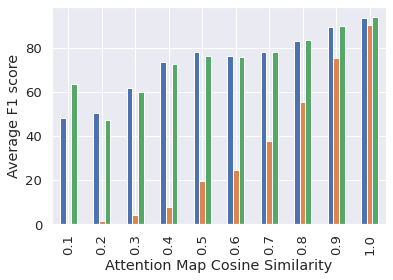

In [19]:
f1plot = data.plot(
    x='cos_sim',
    y=[
        'text_only_f1',
        'heatmap_only_f1', 
        'text_heatmap_f1'
    ],
    kind='bar',
    stacked=False,
    legend=None,
)
f1plot.set_xlabel('Attention Map Cosine Similarity')
f1plot.set_ylabel('Average F1 score')
# f1plot.legend(['Attention map only', 'Text and map'])

Text(0, 0.5, 'Average Precision')

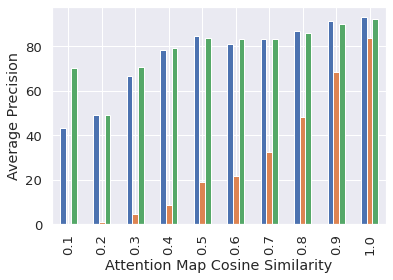

In [20]:
prec_plot = data.plot(
    x='cos_sim',
    y=[
        'text_only_prec', 
        'heatmap_only_prec', 
        'text_heatmap_prec'
    ],
    kind='bar',
    stacked=False,
    legend=None
)
prec_plot.set_xlabel('Attention Map Cosine Similarity')
prec_plot.set_ylabel('Average Precision')
# prec_plot.legend(['Text learning only', 'Map learning only', 'Text+map learning'], bbox_to_anchor=(0.75, -0.3),fancybox=True, shadow=True)

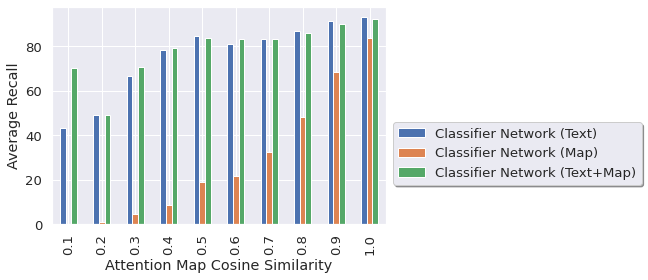

In [21]:
rec_plot = data.plot(
    x='cos_sim',
        y=[
        'text_only_prec', 
        'heatmap_only_prec', 
        'text_heatmap_prec'
    ],
    kind='bar',
    stacked=False,
    legend=None
)
rec_plot.set_xlabel('Attention Map Cosine Similarity')
rec_plot.set_ylabel('Average Recall')
rec_plot.legend(['Classifier Network (Text)', 'Classifier Network (Map)', 'Classifier Network (Text+Map)'], 
                bbox_to_anchor=(1, 0.5),
                fancybox=True, shadow=True, 
                # loc='upper right'
            )

# Scores over easy and hard VGP

In [22]:
def Jaccard_sim(x, y):
    phrase_set1 = set(x.split('+'))
    phrase_set2 = set(y.split('+'))

    intersect = len(phrase_set1.intersection(phrase_set2))
    union = len(phrase_set1.union(phrase_set2))
    return intersect/union

In [23]:
from tqdm import tqdm
import csv

test_path = '/work/adapting-CLIP-VGPs/data/flickr/phrases_data/phrase_pair_remove_trivial_match_test.csv'

phrases = []
scores = []
gt = []

with open(test_path, encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for i, row in tqdm(enumerate(reader)):
        phrase1 = row['phrase1']
        phrase2 = row['phrase2']
        label = row['ytrue']
        scores.append(Jaccard_sim(phrase1, phrase2))
        phrases.append([phrase1, phrase2])
        gt.append(row['ytrue']=='True')

81285it [00:00, 81996.74it/s]


In [24]:
data = pd.read_csv('/work/adapting-CLIP-VGPs/eval/test_text_hm.csv')
data.rename(columns={'pred': 'text_map_cosavg_pred'}, inplace=True)
data['text_cos_sim_pred'] = data.text_sim > 0.809
data['map_cos_sim_pred'] = data.heatmap_sim > 0.74
data['Jaccard_sim'] = scores
data['text_only_pred'] = text_only_pred
data['heatmap_only_pred'] = heatmap_only_pred
data['text_heatmap_pred'] = text_heatmap_pred
data['Jaccard_pred'] = np.array(scores)>0.0
data

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
0,1016887272,"['Several climbers', 'Seven climbers']",0.886846,0.931074,0.908960,True,True,True,True,0.333333,1.0,1.0,1.0,True
1,1016887272,"['Several climbers', 'a rock face']",0.669547,0.151576,0.410561,False,False,False,False,0.000000,0.0,0.0,0.0,False
2,1016887272,"['Several climbers', 'another man']",0.614288,0.332594,0.473441,False,False,False,False,0.000000,0.0,0.0,0.0,False
3,1016887272,"['Several climbers', 'the rope']",0.594157,0.239266,0.416711,False,False,False,False,0.000000,0.0,0.0,0.0,False
4,1016887272,"['the rock', 'Seven climbers']",0.587064,0.153814,0.370439,False,False,False,False,0.000000,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81280,1015118661,"['a man', 'the street']",0.778840,0.597029,0.687934,False,False,False,False,0.000000,0.0,0.0,0.0,False
81281,1015118661,"['A boy', 'A young boy']",0.940454,0.888069,0.914262,True,True,True,True,0.500000,1.0,1.0,1.0,True
81282,1015118661,"['A boy', 'the street']",0.765728,0.294031,0.529879,False,False,False,False,0.000000,0.0,0.0,0.0,False
81283,1015118661,"['a stony wall', 'A young boy']",0.691807,0.153298,0.422552,False,False,False,False,0.000000,0.0,0.0,0.0,False


In [25]:
# from tqdm import tqdm
# import csv

# test_path = '/work/adapting-CLIP-VGPs/data/flickr/phrases_data/phrase_pair_remove_trivial_match_val.csv'

# phrases = []
# scores = []
# gt = []

# with open(test_path, encoding='utf-8') as f:
#     reader = csv.DictReader(f)
#     for i, row in tqdm(enumerate(reader)):
#         phrase1 = row['phrase1']
#         phrase2 = row['phrase2']
#         label = row['ytrue']
#         scores.append(Jaccard_sim(phrase1, phrase2))
#         phrases.append([phrase1, phrase2])
#         gt.append(row['ytrue']=='True')

In [26]:
# data = pd.read_csv('/work/adapting-CLIP-VGPs/eval/val_text_hm.csv')
# data.rename(columns={'pred': 'text_map_cosavg_pred'}, inplace=True)
# # data['text_cos_sim_pred'] = data.text_sim > 0.809
# # data['map_cos_sim_pred'] = data.heatmap_sim > 0.74
# data['Jaccard_sim'] = scores
# # data['text_only_pred'] = text_only_pred
# # data['heatmap_only_pred'] = heatmap_only_pred
# # data['text_heatmap_pred'] = text_heatmap_pred
# data['Jaccard_pred'] = np.array(scores)>0.0
# data

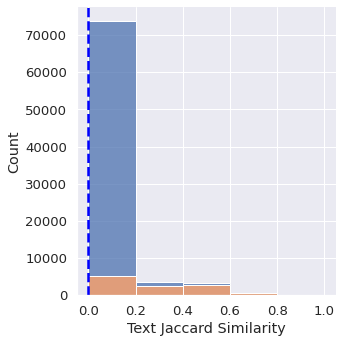

In [27]:
data
plot = sns.displot(
    data,
    x="Jaccard_sim",
    bins=5,
    hue="ytrue",
    multiple="stack",
    # _kws={'log':True}
    legend=None,
    facet_kws=dict(sharey=False, sharex=False)
)
# plot.axvline()
# plot.set(ylabel=None)
# plot.set(yscale='log')

def specs(x, thres, pos_median, neg_median, **kwargs):
    # plt.axvline(pos_median, c='green', ls='-', lw=2.5)
    # plt.axvline(neg_median, c='red', ls='-', lw=2.5)
    plt.axvline(thres, c='blue', ls='--', lw=2.5)
    # plt.set(xlabel=None)
    # plt.legend(axvline)
    # plt.axvline(x.mean(), c='yellow', ls='--', lw=2.5)

col = 'Jaccard_sim'
pos_median = data[data.ytrue==True][col].mean()
neg_median = data[data.ytrue==False][col].mean()
plot.map(specs, col , pos_median=pos_median, neg_median=neg_median, thres=0.0 )
plot.set_xlabels('Text Jaccard Similarity')


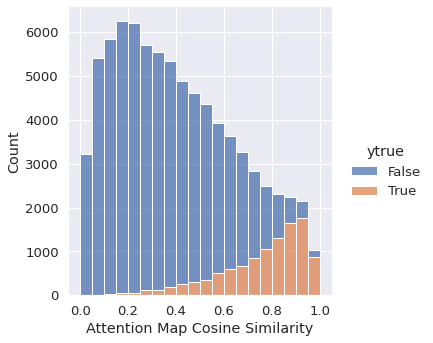

In [28]:

plot = sns.displot(
    data,
    x="heatmap_sim",
    bins=20,
    hue="ytrue",
    multiple="stack",
    # _kws={'log':True}
    # legend=None,
)



# plot.set(ylabel=None)
# plot.set(yscale='log')
col = 'heatmap_sim'
pos_median = data[data.ytrue==True][col].mean()
neg_median = data[data.ytrue==False][col].mean()
# plot.map(specs, col , pos_median=pos_median, neg_median=neg_median, thres=0.740 )
plot.set_xlabels('Attention Map Cosine Similarity')

# pos_dist = np.array([h.get_height() for h in plot.patches])
# print(pos_dist)

In [29]:
pos_data = data[data.ytrue==True]
cnts, bin_edges = np.histogram(pos_data.heatmap_sim, bins=10)
cnts

array([  29,   72,  186,  345,  555,  884, 1289, 1905, 2935, 2600])

In [30]:
f1_data = np.array([0.0, 1.29, 4.01, 7.99, 19.81, 24.57, 37.92, 55.57, 75.14, 90.11])
prec_data = np.array([0.0, 1.15, 4.69, 8.85, 19.18, 21.74, 32.57, 47.97, 68.28, 83.88])
rec_data = np.array([0.0, 1.47, 3.51, 7.28, 20.49, 28.26, 45.38, 66.02, 83.53, 97.34])
f1_coef = np.corrcoef(cnts, f1_data)
prec_coef = np.corrcoef(cnts, prec_data)
rec_coef = np.corrcoef(cnts, rec_data)

In [31]:
f1_data=np.array([48.15, 50.36, 61.64, 73.49, 78.27, 76.23, 77.95, 82.93, 89.46, 93.41])
np.corrcoef(cnts, f1_data)

array([[1.        , 0.85802011],
       [0.85802011, 1.        ]])

In [32]:
f1_coef

array([[1.        , 0.98205407],
       [0.98205407, 1.        ]])

In [33]:
prec_coef

array([[1.        , 0.97721581],
       [0.97721581, 1.        ]])

In [34]:
rec_coef

array([[1.        , 0.98453596],
       [0.98453596, 1.        ]])

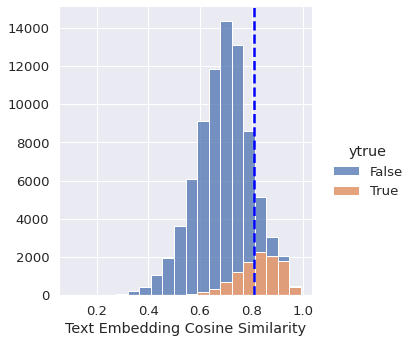

In [35]:
plot = sns.displot(
    data,
    x="text_sim",
    bins=20,
    hue="ytrue",
    multiple="stack",
    # _kws={'log':True}
    # legend=None
)
col = 'text_sim'
pos_median = data[data.ytrue==True][col].mean()
neg_median = data[data.ytrue==False][col].mean()
plot.map(specs, col , pos_median=pos_median, neg_median=neg_median, thres=0.809 )
plot.set_xlabels('Text Embedding Cosine Similarity')
plot.set(ylabel=None)

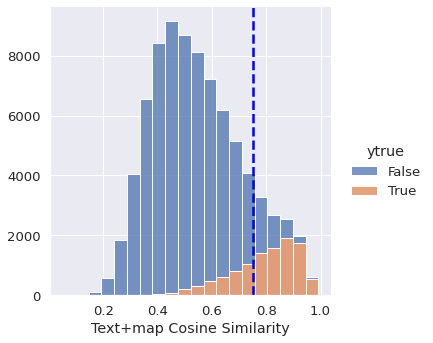

In [36]:
data
plot = sns.displot(
    data,
    x="avgsim",
    bins=20,
    hue="ytrue",
    multiple="stack",
    # _kws={'log':True}
    # legend=None
)

plot.set(ylabel=None)
# plot.set(yscale='log')
col = 'avgsim'
pos_median = data[data.ytrue==True][col].mean()
neg_median = data[data.ytrue==False][col].mean()
plot.map(specs, col , pos_median=pos_median, neg_median=neg_median, thres=0.753 )
plot.set_xlabels('Text+map Cosine Similarity')

In [37]:
easy = data[
    ((data.Jaccard_sim >= 0.25) & data.ytrue)
    | ((data.Jaccard_sim < 0.25) & (data.ytrue == False))
]
easy

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
0,1016887272,"['Several climbers', 'Seven climbers']",0.886846,0.931074,0.908960,True,True,True,True,0.333333,1.0,1.0,1.0,True
1,1016887272,"['Several climbers', 'a rock face']",0.669547,0.151576,0.410561,False,False,False,False,0.000000,0.0,0.0,0.0,False
2,1016887272,"['Several climbers', 'another man']",0.614288,0.332594,0.473441,False,False,False,False,0.000000,0.0,0.0,0.0,False
3,1016887272,"['Several climbers', 'the rope']",0.594157,0.239266,0.416711,False,False,False,False,0.000000,0.0,0.0,0.0,False
4,1016887272,"['the rock', 'Seven climbers']",0.587064,0.153814,0.370439,False,False,False,False,0.000000,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81280,1015118661,"['a man', 'the street']",0.778840,0.597029,0.687934,False,False,False,False,0.000000,0.0,0.0,0.0,False
81281,1015118661,"['A boy', 'A young boy']",0.940454,0.888069,0.914262,True,True,True,True,0.500000,1.0,1.0,1.0,True
81282,1015118661,"['A boy', 'the street']",0.765728,0.294031,0.529879,False,False,False,False,0.000000,0.0,0.0,0.0,False
81283,1015118661,"['a stony wall', 'A young boy']",0.691807,0.153298,0.422552,False,False,False,False,0.000000,0.0,0.0,0.0,False


In [38]:
hard = data[
    ((data.Jaccard_sim < 0.25) & data.ytrue)
    | ((data.Jaccard_sim >= 0.25) & (data.ytrue == False))
]
hard

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
5,1016887272,"['the rock', 'a rock face']",0.823491,0.777486,0.800489,True,False,True,True,0.50,0.0,1.0,0.0,True
19,1016887272,"['the line', 'the rope']",0.759768,0.659082,0.709425,True,True,False,False,0.00,1.0,0.0,0.0,False
20,1016887272,"['Several climbers', 'A group of people']",0.762660,0.578440,0.670550,False,True,False,False,0.00,1.0,0.0,1.0,False
30,1016887272,"['Several climbers', 'A group of people']",0.762660,0.578440,0.670550,False,True,False,False,0.00,1.0,0.0,1.0,False
43,1016887272,"['Several climbers', 'A collage of one person']",0.640140,0.440216,0.540178,False,True,False,False,0.00,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81141,5501340599,"['a stuffed animal', 'her teddy bear']",0.757123,0.870820,0.813971,True,True,False,True,0.00,1.0,1.0,1.0,False
81180,1015118661,"['Smiling boy', 'A young child']",0.782082,0.678251,0.730166,True,True,False,False,0.00,1.0,1.0,1.0,False
81227,1015118661,"['A little boy', 'A young child']",0.917640,0.954509,0.936075,True,True,True,True,0.00,1.0,1.0,1.0,False
81243,1015118661,"['a stone wall', 'a stone paved street']",0.752302,0.384022,0.568162,False,False,False,False,0.25,0.0,0.0,0.0,True


Text(0, 0.5, 'F1')

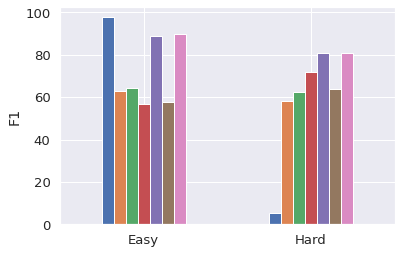

In [39]:
f1_scores = {}
methods = ['Jaccard', 'text_cos_sim', 'map_cos_sim', 'text_map_cosavg', 
           'text_only', 
           'heatmap_only', 'text_heatmap']
method_labels = ['Jaccard Similarity (Text)', 'Cosine Similarity (Text)', 'Cosine Similarity (Text)', 'Cosine Similarity (Text+Map)', 'Classifier Network (Text)', 'Classifer Network (Map)', 'Classifier Network (Text+Map)']
x = ['Easy', 'Hard']

for method in methods:
    f1_scores[method] = []

for table in [easy, hard]:
    for method in methods:
        f1 = f1_score(table.ytrue, table[f'{method}_pred'])*100
        f1_scores[method].append(f1.round(2))

# Plot
f1_data = pd.DataFrame(f1_scores)
f1plot = f1_data.plot(
    kind='bar',
    stacked=False,
    legend=None
)
f1plot.set_xticklabels(x, rotation=360)
f1plot.set_ylabel('F1')
# f1plot.legend(
#     method_labels, loc='upper center', 
#     bbox_to_anchor=(0.5, -0.1),
#     fancybox=True, shadow=True, ncol=2
# )

In [40]:
f1_scores

{'Jaccard': [97.72, 5.55],
 'text_cos_sim': [62.95, 58.14],
 'map_cos_sim': [64.26, 62.61],
 'text_map_cosavg': [56.69, 71.95],
 'text_only': [88.97, 80.78],
 'heatmap_only': [57.87, 63.91],
 'text_heatmap': [89.72, 80.63]}

Text(0, 0.5, 'Precision')

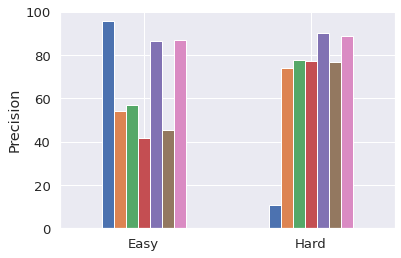

In [41]:
prec_scores = {}

for method in methods:
    prec_scores[method] = []

for table in [easy, hard]:
    for method in methods:
        prec = precision_score(table.ytrue, table[f'{method}_pred'])*100
        prec_scores[method].append(prec.round(2))

# Plot
prec_data = pd.DataFrame(prec_scores)
prec_plot = prec_data.plot(
    kind='bar',
    stacked=False,
    legend=None
)
prec_plot.set_xticklabels(x, rotation=360)
prec_plot.set_ylabel('Precision')
# prec_plot.legend(
#     method_labels, loc='upper center', 
#     bbox_to_anchor=(0.5, -0.3),
#     fancybox=True, shadow=True, ncol=2
# )

In [42]:
prec_scores

{'Jaccard': [95.53, 10.55],
 'text_cos_sim': [53.95, 73.89],
 'map_cos_sim': [56.66, 77.77],
 'text_map_cosavg': [41.68, 77.11],
 'text_only': [86.18, 89.96],
 'heatmap_only': [45.42, 76.61],
 'text_heatmap': [86.68, 88.72]}

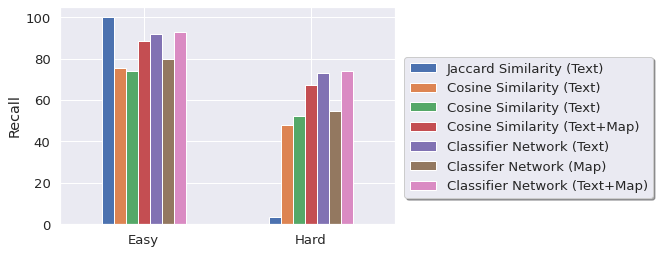

In [43]:
rec_scores = {}

for method in methods:
    rec_scores[method] = []

for table in [easy, hard]:
    for method in methods:
        rec = recall_score(table.ytrue, table[f'{method}_pred'])*100
        rec_scores[method].append(rec.round(2))

# Plot
rec_data = pd.DataFrame(rec_scores)
rec_plot = rec_data.plot(
    kind='bar',
    stacked=False,
    legend=None
)
rec_plot.set_xticklabels(x, rotation=360)
rec_plot.set_ylabel('Recall')
rec_plot.legend(
    method_labels, loc='upper center', 
    bbox_to_anchor=(1.4, 0.8),
    fancybox=True, shadow=True
)

# 4. Visualize some identification

In [44]:
hard

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
5,1016887272,"['the rock', 'a rock face']",0.823491,0.777486,0.800489,True,False,True,True,0.50,0.0,1.0,0.0,True
19,1016887272,"['the line', 'the rope']",0.759768,0.659082,0.709425,True,True,False,False,0.00,1.0,0.0,0.0,False
20,1016887272,"['Several climbers', 'A group of people']",0.762660,0.578440,0.670550,False,True,False,False,0.00,1.0,0.0,1.0,False
30,1016887272,"['Several climbers', 'A group of people']",0.762660,0.578440,0.670550,False,True,False,False,0.00,1.0,0.0,1.0,False
43,1016887272,"['Several climbers', 'A collage of one person']",0.640140,0.440216,0.540178,False,True,False,False,0.00,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81141,5501340599,"['a stuffed animal', 'her teddy bear']",0.757123,0.870820,0.813971,True,True,False,True,0.00,1.0,1.0,1.0,False
81180,1015118661,"['Smiling boy', 'A young child']",0.782082,0.678251,0.730166,True,True,False,False,0.00,1.0,1.0,1.0,False
81227,1015118661,"['A little boy', 'A young child']",0.917640,0.954509,0.936075,True,True,True,True,0.00,1.0,1.0,1.0,False
81243,1015118661,"['a stone wall', 'a stone paved street']",0.752302,0.384022,0.568162,False,False,False,False,0.25,0.0,0.0,0.0,True


In [45]:
hard[
    (hard.text_only_pred==0)
    & (hard.text_sim<0.5)
    & (hard.ytrue==True)
    & (hard.heatmap_sim>0.7)
    & (hard.heatmap_only_pred==1)
    # & (hard.text_map_cosavg_pred==0)
    # & (hard.Jaccard_sim < 0.25)
    # & (hard.text_cos_sim_pred==False)
    # & (hard.heatmap_sim>0.8)
]

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
28907,2822265828,"['A row of young female cheerleaders', 'team']",0.345576,0.718699,0.532138,False,True,False,False,0.0,0.0,1.0,0.0,False
44064,4801764348,"['shiny , metallic , red chairs', 'a bench']",0.474055,0.704025,0.589040,False,True,False,False,0.0,0.0,1.0,0.0,False


In [46]:
hard[
    (hard.text_only_pred==1)
    & (hard.text_sim>0.7)
    & (hard.ytrue==True)
    & (hard.text_heatmap_pred==1)
    & (hard.heatmap_only_pred==0)
    # & (hard.Jaccard_sim > 0.25)
    # & (hard.text_cos_sim_pred==False)
    # & (hard.heatmap_sim<0.6)
]

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
20,1016887272,"['Several climbers', 'A group of people']",0.762660,0.578440,0.670550,False,True,False,False,0.000000,1.0,0.0,1.0,False
30,1016887272,"['Several climbers', 'A group of people']",0.762660,0.578440,0.670550,False,True,False,False,0.000000,1.0,0.0,1.0,False
168,7162685234,"['two brothers', 'Two young , wet boys']",0.772617,0.542189,0.657403,False,True,False,False,0.166667,1.0,0.0,1.0,True
391,2853682342,"['the grass', 'a park']",0.768046,0.572982,0.670514,False,True,False,False,0.000000,1.0,0.0,1.0,False
675,2612125121,"['a middle-aged white man', 'painter']",0.707150,0.410047,0.558598,False,True,False,False,0.000000,1.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80515,449352117,"['A brown and black puppy', 'A small dog']",0.713494,0.594879,0.654186,False,True,False,False,0.000000,1.0,0.0,1.0,False
80518,449352117,"['A brown and black puppy', 'A small dog']",0.713494,0.594879,0.654186,False,True,False,False,0.000000,1.0,0.0,1.0,False
80586,2735558076,"['pavement', 'the sidewalk']",0.813033,0.788148,0.800591,True,True,True,True,0.000000,1.0,0.0,1.0,False
80766,4442319130,"['Person', 'A man']",0.832434,0.763067,0.797750,True,True,True,True,0.000000,1.0,0.0,1.0,False


In [47]:
hard[
    (hard.text_only_pred==1)
    # & (hard.text_sim>0.7)
    & (hard.ytrue==True)
    & (hard.text_heatmap_pred==0)
    & (hard.heatmap_only_pred==0)
    # & (hard.Jaccard_sim > 0.25)
    # & (hard.text_cos_sim_pred==False)
    # & (hard.heatmap_sim<0.6)
]

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
19,1016887272,"['the line', 'the rope']",0.759768,0.659082,0.709425,True,True,False,False,0.0,1.0,0.0,0.0,False
73,1016887272,"['Seven climbers', 'A collage of one person']",0.579454,0.541876,0.560665,False,True,False,False,0.0,1.0,0.0,0.0,False
873,3134644844,"['a sick child', 'a girl']",0.829291,0.636281,0.732786,True,True,True,False,0.0,1.0,0.0,0.0,False
1368,6232601127,"['The skilled potter', 'A man']",0.696374,0.376964,0.536669,False,True,False,False,0.0,1.0,0.0,0.0,False
1591,269898428,"['an electric drill', 'a screwdriver']",0.777476,0.599000,0.688238,False,True,False,False,0.0,1.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80241,118854260,"['something', 'construction paper']",0.734474,0.747439,0.740957,True,True,False,True,0.0,1.0,0.0,0.0,False
80295,118854260,"['something', 'construction paper']",0.734474,0.747439,0.740957,True,True,False,True,0.0,1.0,0.0,0.0,False
80423,4222067827,"['a very interested little girl', 'This boy']",0.725572,0.386116,0.555844,False,True,False,False,0.0,1.0,0.0,0.0,False
80434,4222067827,"['a red and black mask', 'a helmet']",0.691084,0.465604,0.578344,False,True,False,False,0.0,1.0,0.0,0.0,False


In [48]:
data

,img_idx,phrases,text_sim,heatmap_sim,avgsim,text_map_cosavg_pred,ytrue,text_cos_sim_pred,map_cos_sim_pred,Jaccard_sim,text_only_pred,heatmap_only_pred,text_heatmap_pred,Jaccard_pred
0,1016887272,"['Several climbers', 'Seven climbers']",0.886846,0.931074,0.908960,True,True,True,True,0.333333,1.0,1.0,1.0,True
1,1016887272,"['Several climbers', 'a rock face']",0.669547,0.151576,0.410561,False,False,False,False,0.000000,0.0,0.0,0.0,False
2,1016887272,"['Several climbers', 'another man']",0.614288,0.332594,0.473441,False,False,False,False,0.000000,0.0,0.0,0.0,False
3,1016887272,"['Several climbers', 'the rope']",0.594157,0.239266,0.416711,False,False,False,False,0.000000,0.0,0.0,0.0,False
4,1016887272,"['the rock', 'Seven climbers']",0.587064,0.153814,0.370439,False,False,False,False,0.000000,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81280,1015118661,"['a man', 'the street']",0.778840,0.597029,0.687934,False,False,False,False,0.000000,0.0,0.0,0.0,False
81281,1015118661,"['A boy', 'A young boy']",0.940454,0.888069,0.914262,True,True,True,True,0.500000,1.0,1.0,1.0,True
81282,1015118661,"['A boy', 'the street']",0.765728,0.294031,0.529879,False,False,False,False,0.000000,0.0,0.0,0.0,False
81283,1015118661,"['a stony wall', 'A young boy']",0.691807,0.153298,0.422552,False,False,False,False,0.000000,0.0,0.0,0.0,False
